In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#This gives us a whitegrid background
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data 
from pandas_datareader import DataReader


from datetime import datetime


from __future__ import division

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year - 1,end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,179.172688,176.377036,177.694625,177.827036,2.989162e+07,176.423908
std,16.341475,16.360953,16.256016,16.429177,1.269762e+07,17.049511
min,151.830002,149.160004,149.990005,150.550003,1.251390e+07,148.307571
25%,169.919998,165.429993,167.500000,167.779999,2.081060e+07,166.053055
50%,175.419998,173.399994,174.589996,174.729996,2.621220e+07,172.864822
75%,188.500000,186.210007,187.720001,187.630005,3.542700e+07,186.974258
max,229.669998,226.630005,228.990005,228.360001,8.659380e+07,228.360001


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-09-05 to 2018-09-05
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


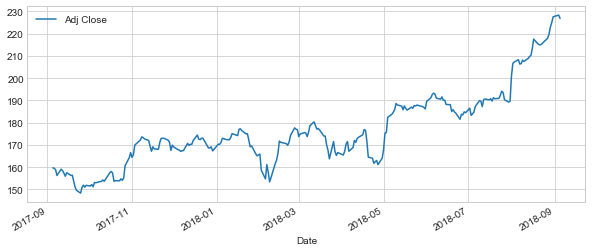

In [7]:
#Adjusted closing price of the stock 
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

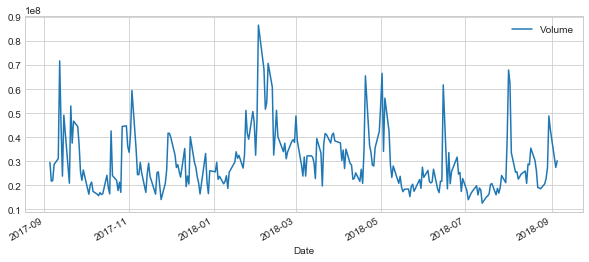

In [8]:
AAPL['Volume'].plot(legend=True,figsize =(10,4))

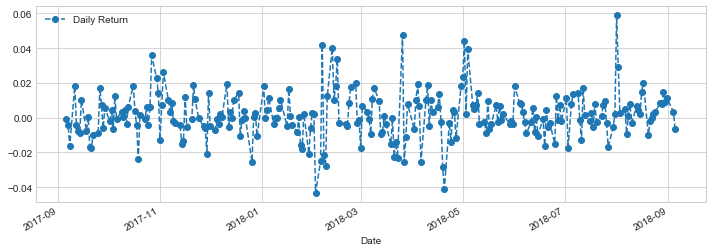

In [10]:
#daily return analysis 
#we will use pct_change to find the daily return 
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
#now we are going to plot the daily return percentage 
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [11]:
#Now we want to look at the average daily return using a histogram. We will plot it with kde plot using seaborn 

/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


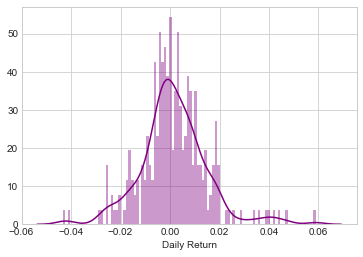

In [12]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
#Could have also done AAPL['Daily Return'].hist()

In [13]:
#Lets analyzie the daily returns from all the things in our stock list 

In [14]:
#To do this we have to put it all into a dataframe together 
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-05,159.665848,965.270020,928.450012,72.306847
2017-09-06,159.498367,967.799988,927.809998,72.100578
2017-09-07,158.858032,979.469971,935.950012,73.023933
2017-09-08,156.267227,965.900024,926.500000,72.670311
2017-09-11,159.094467,977.960022,929.080017,73.436501


In [42]:
#now that we have all the closing prices lets get the daily returns for them!
returns = closing_df.pct_change()

In [17]:
returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-05,NaN,NaN,NaN,NaN
2017-09-06,-0.001049,0.002621,-0.000689,-0.002853
2017-09-07,-0.004015,0.012058,0.008773,0.012806
2017-09-08,-0.016309,-0.013854,-0.010097,-0.004843
2017-09-11,0.018092,0.012486,0.002785,0.010543


In [18]:
#now we can compare the percent returns of two stocks using .jointplot()

/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


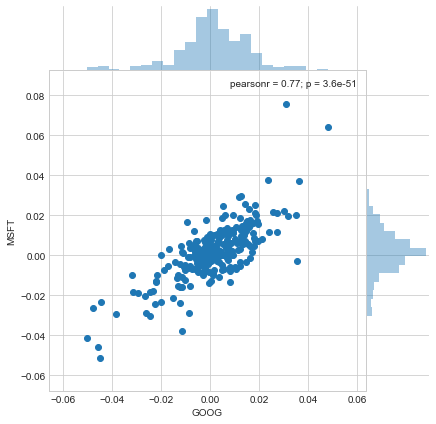

In [19]:
sns.jointplot('GOOG','MSFT',data=returns,kind='scatter',space=.01)

In [20]:
#it is nice to be able to compare one to one but it is also nice to get a 
#holistic view which can be done with .pairplot()

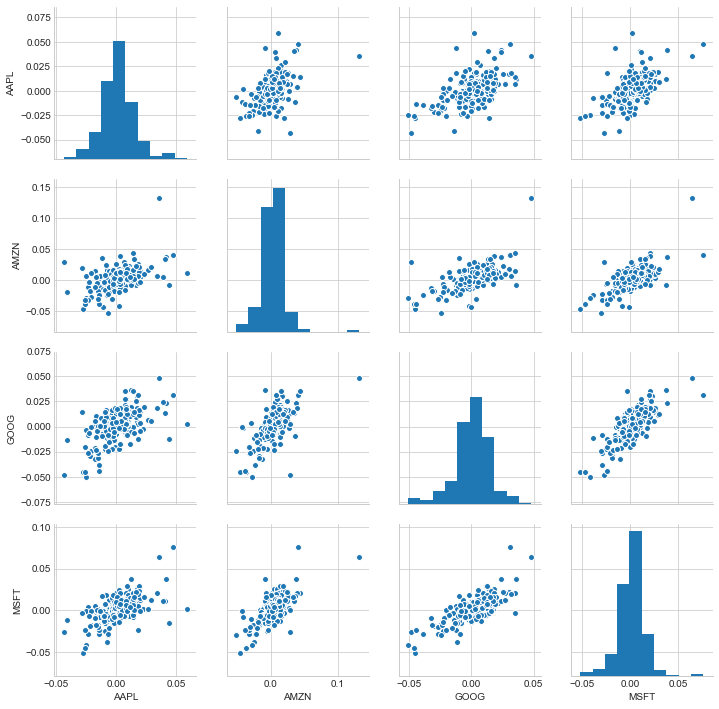

In [21]:
sns.pairplot(returns.dropna())

/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s

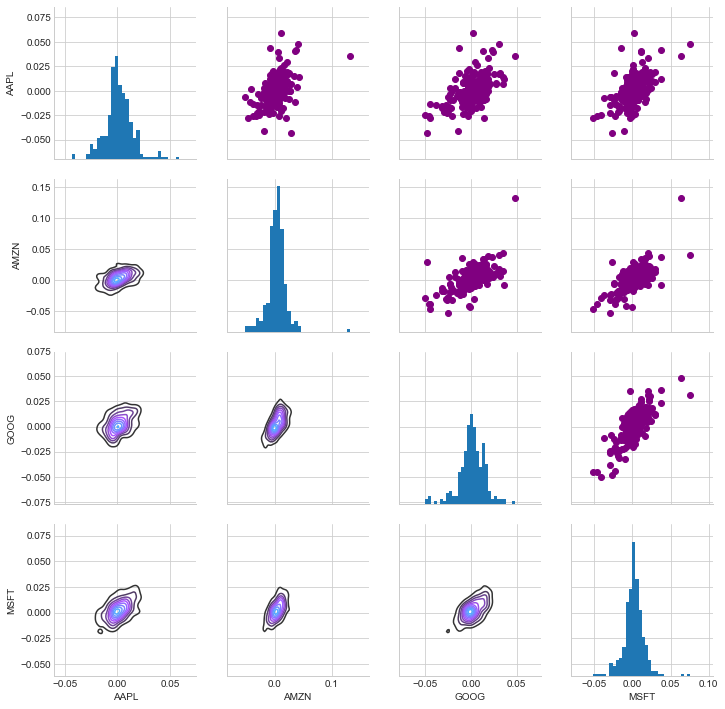

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [23]:
#sns.heatmap(returns.dropna(),annot=True)

In [24]:
#Risk assesment 

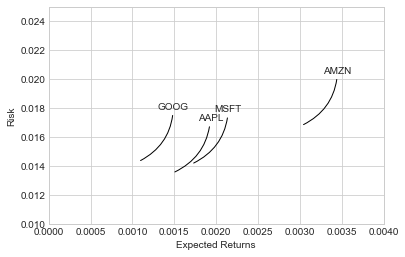

In [25]:
rets = returns.dropna()
area = np.pi*20
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

plt.ylim([0.01,0.025])
plt.xlim([0.000,0.004])

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


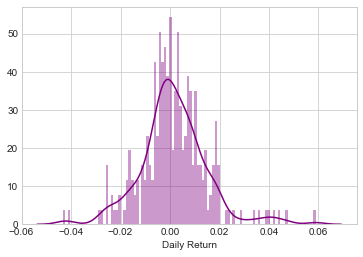

In [26]:
#plotting the daily returns of the apple stock 
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [27]:
#now lets get the 0.05 empirical value for the distribution 
rets['AAPL'].quantile(0.05)

-0.020718530026279724

In [28]:
#The 0.05 empirical quantile of daily returns is at -0.021. 
#That means that with 95% confidence, our worst daily loss will not exceed 2.10%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is 0.021 * 1,000,000 = $21,000.

In [29]:
#mote-carlo method

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = returns.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = returns.std()['GOOG']

In [30]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [31]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-05,937.000000,921.960022,933.080017,928.450012,1326400,928.450012
2017-09-06,930.914978,919.270020,930.150024,927.809998,1527700,927.809998
2017-09-07,936.409973,923.619995,931.729980,935.950012,1212700,935.950012
2017-09-08,936.989990,924.880005,936.489990,926.500000,1011500,926.500000
2017-09-11,938.380005,926.919983,934.250000,929.080017,1267000,929.080017


Text(0.5,1,'Monte Carlo Analysis for Google')

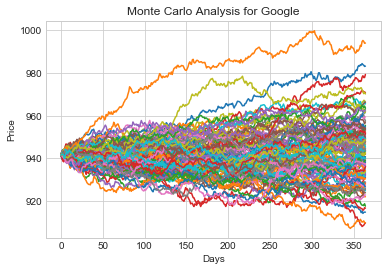

In [32]:
start_price = 941.53

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [33]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

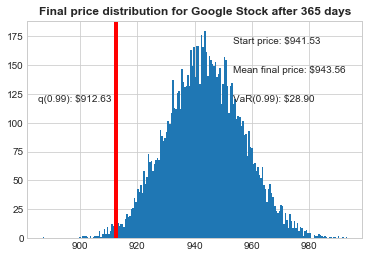

In [34]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');